# Clustering

## Unsupervised Learning

![](media\unsupervised.png)

![](media\unsupervised.jpg)

## Semi-Supervised Learning

![](media\semisupervised.png)

## Clustering Problem Definition

Given: \
$X=(x_1,\ldots,x_n)^T - $ input data \
$k - $ number of clusters \
$d(X_1,X_2) - $ distance function (metric) \
$F(X) - $ objectivity function \
$C=(c_1,\ldots,c_k) - $ optimal split into clusters

<AxesSubplot:>

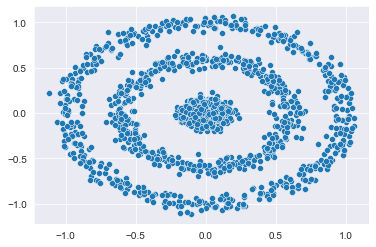

In [204]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

X_1, _ = make_circles(1000, random_state=42, noise=0.05, factor=.1)
X_2, _ = make_circles(1000, random_state=42, noise=0.05, factor=.6)
X = np.concatenate((X_1, X_2))
sns.scatterplot(x=X[:, 0], y=X[:, 1])

## Evaluation

### Silhouette

$$a_i=\frac{1}{|c_I|-1}\sum_{j\in c_I,i\neq j}{d(x_i,x_j)}$$
$$b_i=\min_{J\neq I}\frac{1}{c_I}\sum_{j\in c_J}{d(x_i,x_j)}$$
$$s_i=\frac{a_i-b_i}{\min\{a_i,b_i\}}$$

In [205]:
from sklearn.metrics import silhouette_score

### Elbow (Inertia)

$$\sum_{i=1}^n{\min_{\mu_j\in C}{|x_i-\mu_j|}}$$

### AIC

$\hat{L} - $ likelihood function
$$AIC=2\,k-2\,\ln{\hat{L}}$$

## Algorithms

### Centroid-Based

#### K-Means

$\mu_j - $ jth centroid, $j\in\{1,\ldots,k\}$

$$\hat{C}=\operatorname{argmin}_C{\sum_{j=1}^k\sum_{x\in c_j}d(x,\mu_j)}$$

In [206]:
ks = list(range(2, 11))

In [209]:
from sklearn.cluster import KMeans

means = KMeans(n_clusters=3, random_state=42).fit(X)

<AxesSubplot:>

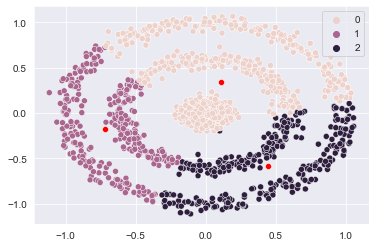

In [210]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=means.predict(X))
sns.scatterplot(x=means.cluster_centers_[:, 0], y=means.cluster_centers_[:, 1], color='red')

<AxesSubplot:>

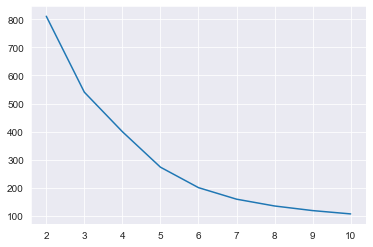

In [211]:
inertias = []
for k in ks:
    inertias.append(KMeans(n_clusters=k, random_state=42).fit(X).inertia_)
sns.lineplot(x=ks, y=inertias)

<AxesSubplot:>

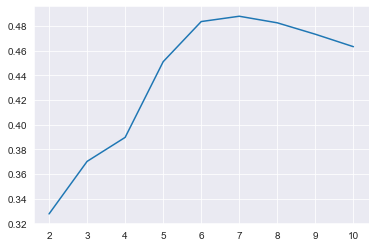

In [212]:
silhouettes = []
for k in ks:
    model = KMeans(n_clusters=k, random_state=42).fit(X)
    silhouettes.append(silhouette_score(X, model.predict(X)))
sns.lineplot(x=ks, y=silhouettes)

### Density-Based

#### DBSCAN

![](media\DBSCAN.png)

In [213]:
from sklearn.cluster import DBSCAN

scan = DBSCAN(eps=.1, min_samples=10).fit(X)

<AxesSubplot:>

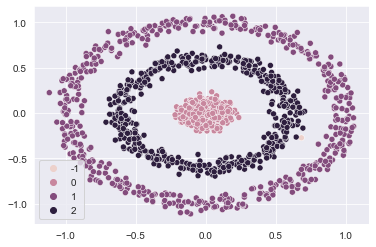

In [214]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=scan.labels_)

<AxesSubplot:>

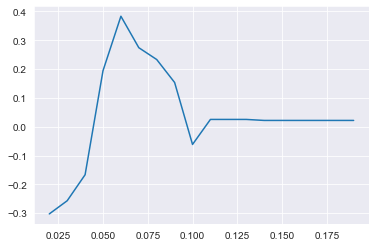

In [224]:
silhouettes = []
es = [i/100 for i in range(1, 20)]
for e in es:
    model = DBSCAN(eps=e, min_samples=10).fit(X)
    try:
        silhouettes.append(silhouette_score(X, model.labels_))
    except:
        silhouettes.append(np.nan)
sns.lineplot(x=es, y=silhouettes)

#### Metrics

![](media\distance.png)

![](media\minkowski.jpg)

In [215]:
from sklearn.cluster import DBSCAN

scan_minkowski = DBSCAN(eps=.1, min_samples=10, metric='minkowski', p=1).fit(X)

<AxesSubplot:>

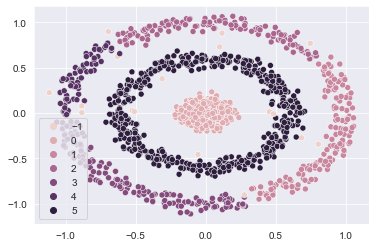

In [216]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=scan_minkowski.labels_)

<AxesSubplot:>

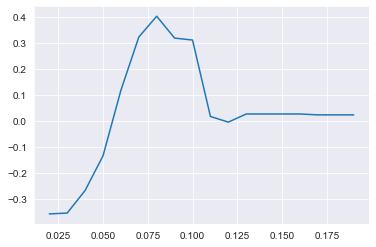

In [225]:
silhouettes = []
es = [i/100 for i in range(1, 20)]
for e in es:
    model = DBSCAN(eps=e, min_samples=10, metric='minkowski', p=1).fit(X)
    try:
        silhouettes.append(silhouette_score(X, model.labels_))
    except:
        silhouettes.append(np.nan)
sns.lineplot(x=es, y=silhouettes)

### Distribution-Based

#### Gaussian Mixtures

![](media\mixture.png)

In [228]:
from sklearn.mixture import GaussianMixture

mixture = GaussianMixture(n_components=3, random_state=42).fit(X)

<AxesSubplot:>

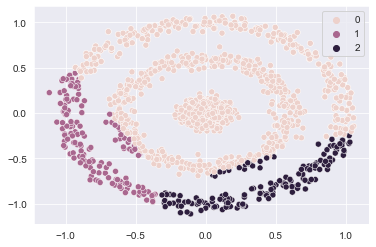

In [229]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=mixture.predict(X))

<AxesSubplot:>

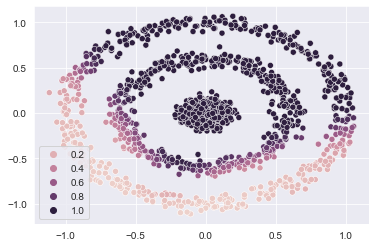

In [230]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=mixture.predict_proba(X)[:, 0])

In [231]:
import numpy as np
N = 100
S = np.stack((np.repeat(np.linspace(min(X[:, 0]), max(X[:, 0]), N), np.array(N * np.ones(N), dtype=int)),
              list(np.linspace(min(X[:, 1]), max(X[:, 1]), N)) * N), axis=1)

<AxesSubplot:>

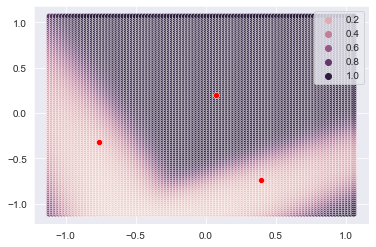

In [233]:
sns.scatterplot(x=S[:, 0], y=S[:, 1], hue=mixture.predict_proba(S)[:, 0])
sns.scatterplot(x=mixture.means_[:, 0], y=mixture.means_[:, 1], color='red')

<AxesSubplot:>

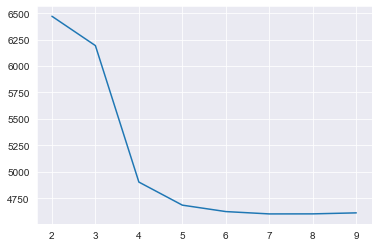

In [238]:
AICs = []
for k in ks:
    AICs.append(GaussianMixture(n_components=k, random_state=42).fit(X).aic(X))
sns.lineplot(x=ks, y=AICs)

<AxesSubplot:>

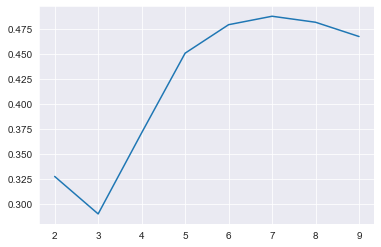

In [239]:
silhouettes = []
for k in ks:
    model = GaussianMixture(n_components=k, random_state=42).fit(X)
    silhouettes.append(silhouette_score(X, model.predict(X)))
sns.lineplot(x=ks, y=silhouettes)

<AxesSubplot:>

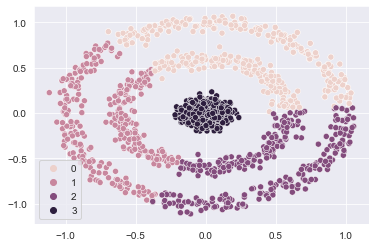

In [235]:
high_mixture = GaussianMixture(n_components=4, random_state=42).fit(X)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=high_mixture.predict(X))

<AxesSubplot:>

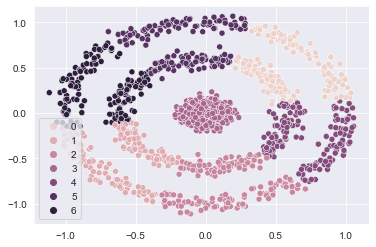

In [240]:
high_mixture = GaussianMixture(n_components=7, random_state=42).fit(X)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=high_mixture.predict(X))